In [4]:
import pandas as pd
import numpy as np
import random

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # Asegúrate de importar contextily

In [5]:
# Paso 1: Cargar el dataset
df = pd.read_csv('../data/instituciones.csv', sep=';', encoding='utf-8', engine='python')

In [6]:
# Dimensiones
print("Dimensiones: filas, columnas")
print(df.shape)

print("5 primeros registros")
print(df.head(5))

print("5 ultimos registros")
print(df.tail(5))

Dimensiones: filas, columnas
(10196, 5)
5 primeros registros
                                              nombre   latitud1  longitud1  \
0  CENTRO EDUCATIVO INFANTIL N° 8022 CENTRO DE BI...  25.300653  57.587563   
1      ESCUELA BÁSICA N° 8045 FAITH CHRISTIAN SCHOOL  25.287083  57.599750   
2  CENTRO EDUCATIVO INTEGRAL HELEN KELLER PARA LA...  25.314812  57.605430   
3  COLEGIO TÉCNICO SAN FRANCISCO,ESCUELA BÁSICA N...  25.238030  57.566220   
4  CENTRO DE EDUCACIÓN MEDIA PARA PERSONAS JÓVENE...  25.238030  57.566220   

  departamento    ciudad  
0      Capital  Asunción  
1      Capital  Asunción  
2      Capital  Asunción  
3      Capital  Asunción  
4      Capital  Asunción  
5 ultimos registros
                                                  nombre   latitud1  \
10191  ESPACIO DE DESARROLLO INFANTIL Nº  8305 ESTREL...  22.350788   
10192  ESPACIO DE DESARROLLO INFANTIL Nº 8303 BUBBLES...  25.280094   
10193  ESPACIO DE DESARROLLO INFANTIL Nº  8306 SEMILL...  25.286436   
1019

In [7]:
df['latitud1'] = df['latitud1'] * -1
df['longitud1'] = df['longitud1'] * -1

In [8]:
# Convertir latitud y longitud a tipo float
df['latitud1'] = df['latitud1'].astype(float)
df['longitud1'] = df['longitud1'].astype(float)

In [9]:
# Crear un GeoDataFrame
geometry = gpd.points_from_xy(df['longitud1'], df['latitud1'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

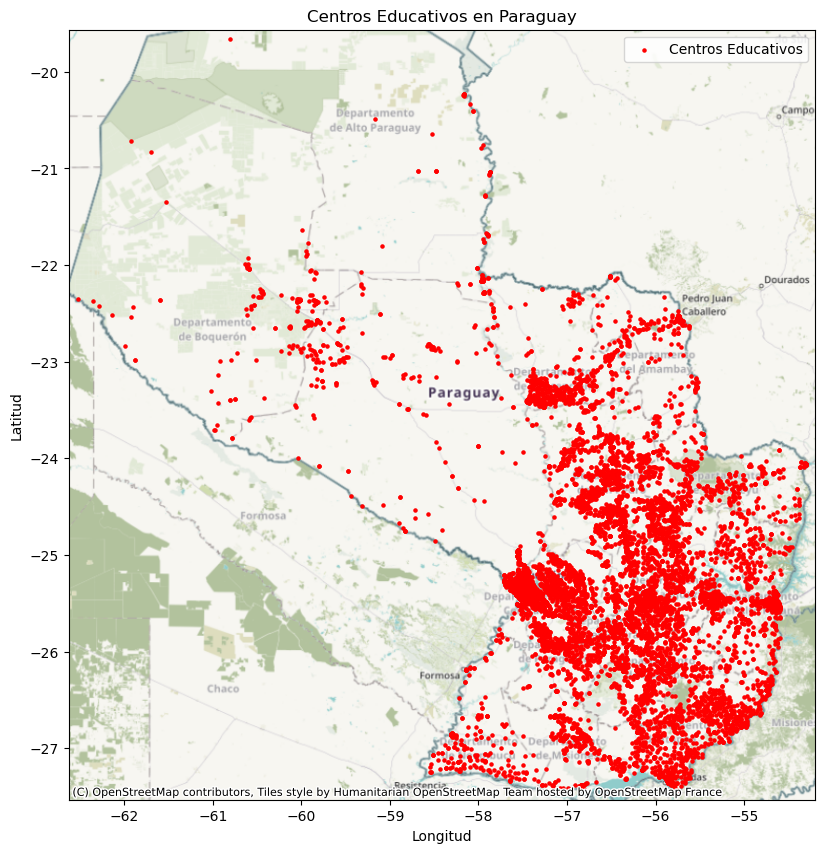

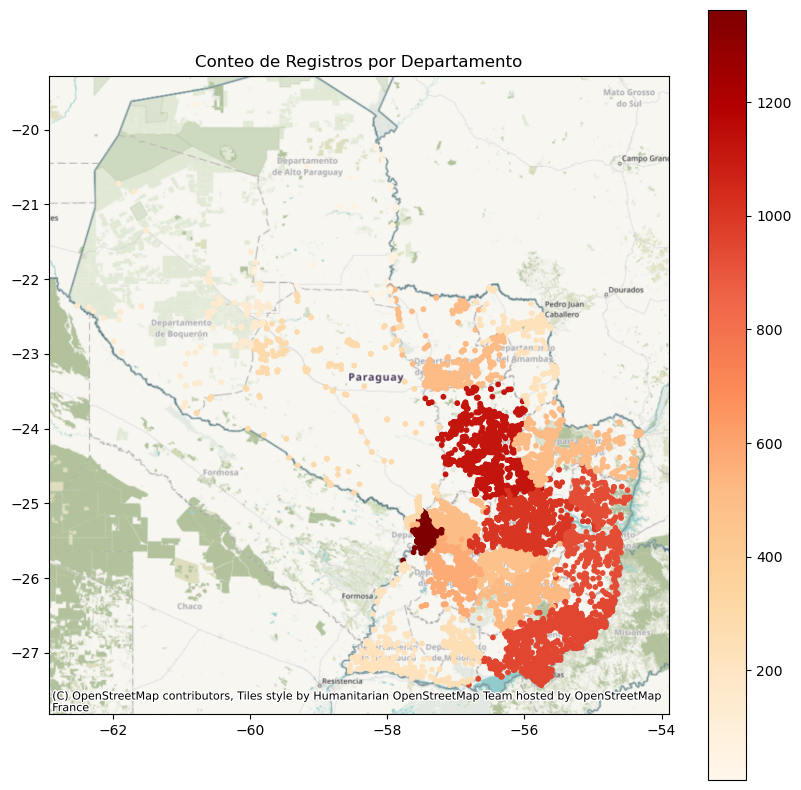

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Cargar el CSV
#df = pd.read_csv('ruta/a/tu/archivo.csv', delimiter=';')

# Convertir latitud y longitud a tipo float
df['latitud1'] = df['latitud1'].astype(float)
df['longitud1'] = df['longitud1'].astype(float)

# Crear un GeoDataFrame
geometry = gpd.points_from_xy(df['longitud1'], df['latitud1'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar CRS (Sistema de Referencia de Coordenadas) WGS 84
gdf.set_crs(epsg=4326, inplace=True)

# Crear un gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Establecer límites del mapa
ax.set_xlim(df['longitud1'].min() - 0.1, df['longitud1'].max() + 0.1)
ax.set_ylim(df['latitud1'].min() - 0.1, df['latitud1'].max() + 0.1)

# Añadir el mapa base de OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs)

# Añadir los puntos del GeoDataFrame
gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Centros Educativos')

# Personalizar el gráfico
plt.title('Centros Educativos en Paraguay')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# Agrupar por departamento y contar registros
departamento_counts = gdf.groupby('departamento').size().reset_index(name='counts')

# Unir conteos al GeoDataFrame
gdf_counts = gdf.merge(departamento_counts, on='departamento', how='left')

# Crear el mapa de nuevo con los tamaños ajustados por conteo
fig, ax = plt.subplots(figsize=(10, 10))
gdf_counts.plot(ax=ax, marker='o', column='counts', cmap='OrRd', legend=True, markersize=10)
ctx.add_basemap(ax, crs=gdf_counts.crs)
plt.title('Conteo de Registros por Departamento')
plt.show()


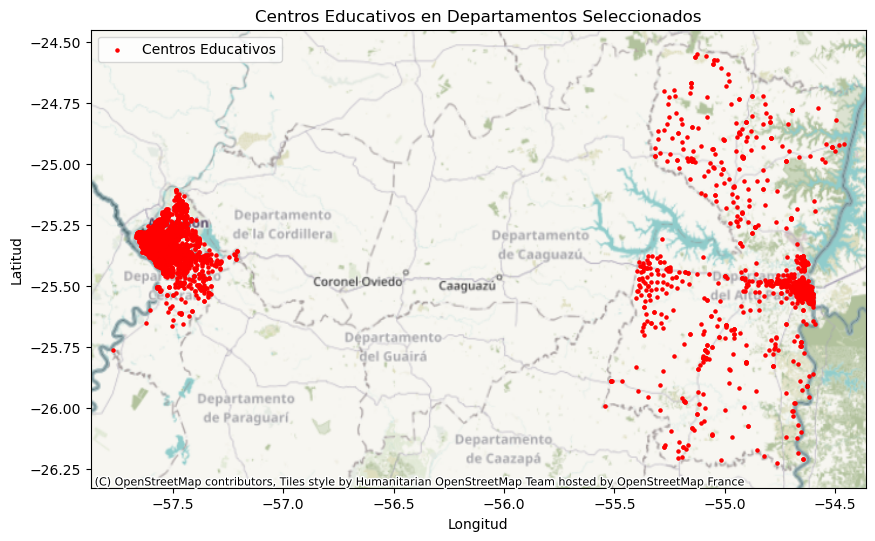

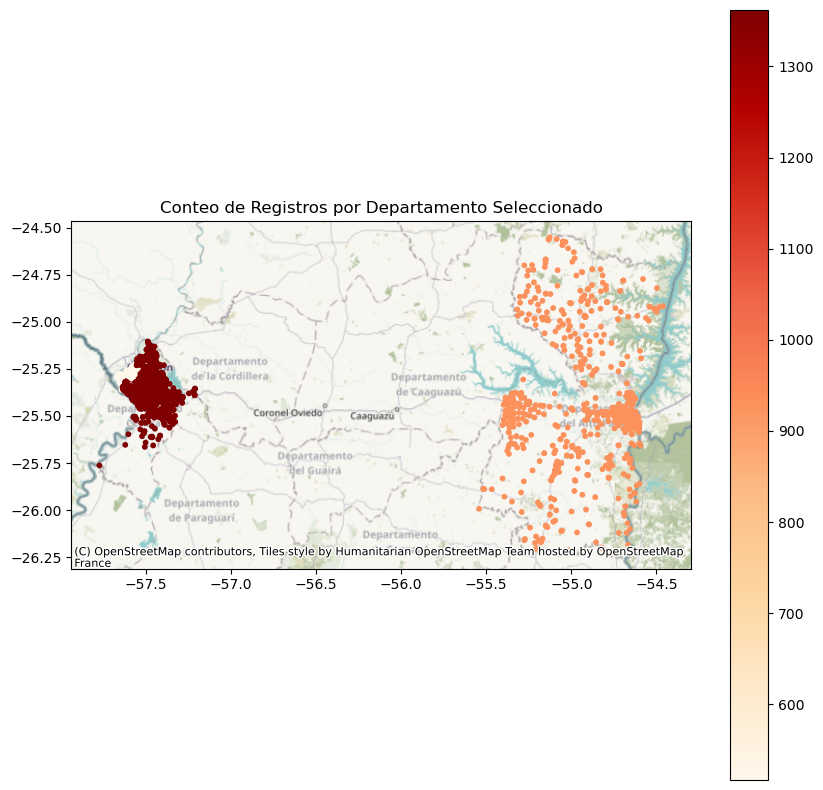

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Cargar el CSV
#df = pd.read_csv('ruta/a/tu/archivo.csv', delimiter=';')

# Convertir latitud y longitud a tipo float
df['latitud1'] = df['latitud1'].astype(float)
df['longitud1'] = df['longitud1'].astype(float)

# Crear un GeoDataFrame
geometry = gpd.points_from_xy(df['longitud1'], df['latitud1'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar CRS (Sistema de Referencia de Coordenadas) WGS 84
gdf.set_crs(epsg=4326, inplace=True)

# Definir los departamentos que deseas visualizar
departamentos_a_visualizar = ['Capital', 'Central', 'Alto Paraná']  # Cambia según tus necesidades

# Filtrar el GeoDataFrame por los departamentos seleccionados
gdf_filtered = gdf[gdf['departamento'].isin(departamentos_a_visualizar)]

# Crear un gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Establecer límites del mapa
ax.set_xlim(gdf_filtered['longitud1'].min() - 0.1, gdf_filtered['longitud1'].max() + 0.1)
ax.set_ylim(gdf_filtered['latitud1'].min() - 0.1, gdf_filtered['latitud1'].max() + 0.1)

# Añadir el mapa base de OpenStreetMap
ctx.add_basemap(ax, crs=gdf_filtered.crs)

# Añadir los puntos del GeoDataFrame filtrado
gdf_filtered.plot(ax=ax, marker='o', color='red', markersize=5, label='Centros Educativos')

# Personalizar el gráfico
plt.title('Centros Educativos en Departamentos Seleccionados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

# Agrupar por departamento y contar registros en el GeoDataFrame filtrado
departamento_counts = gdf_filtered.groupby('departamento').size().reset_index(name='counts')

# Unir conteos al GeoDataFrame filtrado
gdf_counts = gdf_filtered.merge(departamento_counts, on='departamento', how='left')

# Crear el mapa de nuevo con los tamaños ajustados por conteo
fig, ax = plt.subplots(figsize=(10, 10))
gdf_counts.plot(ax=ax, marker='o', column='counts', cmap='OrRd', legend=True, markersize=10)
ctx.add_basemap(ax, crs=gdf_counts.crs)
plt.title('Conteo de Registros por Departamento Seleccionado')
plt.show()


In [2]:
import pandas as pd
import folium

# Cargar los datos de tu archivo CSV
#df = pd.read_csv('ruta/a/tu/archivo.csv', delimiter=';')

# Crear un mapa centrado en Paraguay
m = folium.Map(location=[-23.442, -58.443], zoom_start=6)

# Crear un GeoDataFrame para los departamentos de Paraguay
# Aquí debes proporcionar los límites de cada departamento como un GeoJSON o una lista de coordenadas
# Por simplicidad, se puede omitir el GeoJSON en este ejemplo

# Agregar un marcador por cada centro educativo en el DataFrame
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitud1'], row['longitud1']],
        popup=row['nombre'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Guardar el mapa en un archivo HTML
#m.save('mapa_paraguay.html')

# Mostrar el mapa en un entorno Jupyter (opcional)
m


NameError: name 'df' is not defined

In [10]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display

# Crear el mapa centrado en Paraguay
m = folium.Map(location=[-23.442, -58.443], zoom_start=6)

# Crear un MarkerCluster para agrupar los puntos
marker_cluster = MarkerCluster().add_to(m)

# Agregar puntos al mapa agrupados en el MarkerCluster
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitud1'], row['longitud1']],
        popup=row['nombre'],
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Lista de departamentos únicos
departamentos = df['departamento'].unique().tolist()

# Crear checkboxes para los departamentos
checkboxes = []
for depto in departamentos:
    checkbox = widgets.Checkbox(value=True, description=depto)
    checkboxes.append(checkbox)

# Función para actualizar el mapa según los departamentos seleccionados
def update_map(change):
    # Limpiar marcadores existentes
    for marker in marker_cluster.get_children():
        marker_cluster.remove_child(marker)

    # Agregar nuevamente los marcadores basados en la selección
    for _, row in df.iterrows():
        if any(checkbox.value and checkbox.description == row['departamento'] for checkbox in checkboxes):
            folium.Marker(
                location=[row['latitud1'], row['longitud1']],
                popup=row['nombre'],
                icon=folium.Icon(color='blue')
            ).add_to(marker_cluster)

# Conectar la función de actualización con los checkboxes
for checkbox in checkboxes:
    checkbox.observe(update_map, names='value')

# Mostrar los checkboxes
display(widgets.VBox(checkboxes))

# Mostrar el mapa



In [ ]:
import pandas as pd
import folium
from ipywidgets import Checkbox, VBox, HBox, Button, Output

# Cargar los datos
#df = pd.read_csv('tu_archivo.csv', delimiter=';')

# Crear un mapa centrado en Paraguay
mapa = folium.Map(location=[-23.4420, -58.4438], zoom_start=6)

# Crear una lista de departamentos únicos
departamentos = df['departamento'].unique()

# Crear un diccionario para guardar los checkboxes
checkboxes = {dept: Checkbox(value=False, description=dept) for dept in departamentos}

# Crear un output para mostrar el mapa
output = Output()

def mostrar_mapa(b):
    # Limpiar el mapa anterior
    mapa = folium.Map(location=[-23.4420, -58.4438], zoom_start=6)

    # Filtrar los datos según los checkboxes seleccionados
    for dept, checkbox in checkboxes.items():
        if checkbox.value:
            # Filtrar el DataFrame para el departamento seleccionado
            df_dept = df[df['departamento'] == dept]
            for _, row in df_dept.iterrows():
                folium.Marker(
                    location=[row['latitud1'], row['longitud1']],
                    popup=row['nombre']
                ).add_to(mapa)

    # Mostrar el mapa actualizado
    with output:
        output.clear_output()
        display(mapa)

# Crear un botón para actualizar el mapa
boton_actualizar = Button(description="Actualizar Mapa")
boton_actualizar.on_click(mostrar_mapa)

# Crear un layout con los checkboxes y el botón
ui = VBox(list(checkboxes.values()) + [boton_actualizar])
display(ui, output)
